In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

In [4]:
df = pd.read_csv('Zbior_danych_Titanic.csv')
df.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.55,E12,S,3,?,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,?,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0,A36,S,?,?,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,?,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,?,C,?,22,"Montevideo, Uruguay"


### It can be immediately observed that missing data is marked with a '?' character, which affects how the isnull() function works. The data needs to be properly preprocessed first in order to accurately calculate the amount of missing values.

---

In [5]:
df.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0
cabin,0


### The number of missing values is 0 because they were marked with "?" instead of null/None

In [6]:
df.replace('?', None,inplace=True)
all_nan_data = df.isnull().sum()

print(all_nan_data)

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


### Now the correct number is displayed

---

In [7]:
all_nan_data_p = all_nan_data / 13.09

surv_nan_data = df[df['survived'] == 1].isnull().sum()
surv_nan_data_p = surv_nan_data / 5

n_surv_nan_data = df[df['survived'] == 0].isnull().sum()
n_surv_nan_data_p = n_surv_nan_data / 8.09

res = pd.DataFrame(
    [all_nan_data_p,surv_nan_data_p,n_surv_nan_data_p]
    ,index = ['All data','Survivors', 'Non-survivors']
).T
round(res)

,All data,Survivors,Non-survivors
pclass,0.0,0.0,0.0
survived,0.0,0.0,0.0
name,0.0,0.0,0.0
sex,0.0,0.0,0.0
age,20.0,15.0,23.0
sibsp,0.0,0.0,0.0
parch,0.0,0.0,0.0
ticket,0.0,0.0,0.0
fare,0.0,0.0,0.0
cabin,77.0,61.0,87.0


### "Percentage of missing values depending on the value of the 'survived' variable"

# Analysis of the table above
variable 'age' - data is partially dependent on the 'survived' variable, you can observe a slight increase in percentage of survivors in comparison with non-survivors.

variable 'cabin' - similar situation as with 'age' variable.

variable 'embarked'- amount of missing values is so small, that it's hard to determine the (in)dependencies between variables.

variable 'boat' - missing data here is not truly missing, but rather informative, that a given person hasn't entered the lifeboat so he's propably a caualty.

variable 'body' - similar situation as with the variable 'boat', for survivors the value is null, however there are significant holes in data for non-survivors.

variable 'home.dest' - data appears to be partially dependent, as in 'age' and 'cabin'.


---

## What should be done with missing data
The answer to this question depends on how much data is missing, what is the type of missing data, and e.g. in case of figures what is the distribution of the available data

### Age

In [8]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
age_clean = df['age'].dropna()

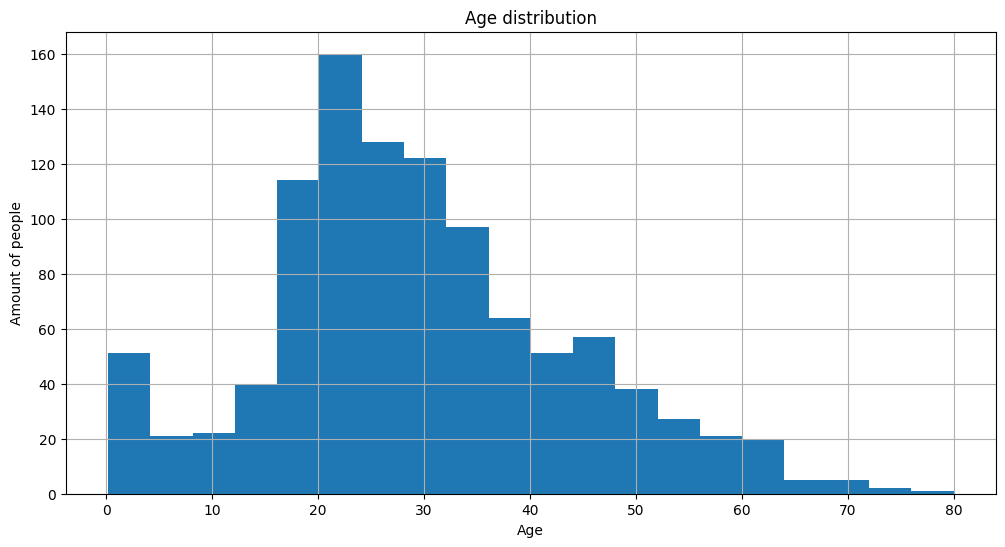

In [9]:
plt.figure(figsize=(12, 6))
age_clean.hist(bins=20)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Amount of people')
plt.show()

In variable 'age' a large amount of data is missing, so dropping rows containing incomplete data is a bad idea. In the chart above it is shown that the distribution of variable 'age' is heterogeneousm, so artificially imputing the data using e.g. mean or median of the whole data is also not a good solution.

In this case the best solution would be to group the data by another variable (np. 'sex', 'pclass') and then determine the expected value of the given group.

### Cabin

In [10]:
df['cabin'].value_counts()

,count
cabin,
C23 C25 C27,6
B57 B59 B63 B66,5
G6,5
D,4
F4,4
...,...
F E46,1
F E57,1
F E69,1


"The 'cabin' variable poses a challenge because, as in the previous case, removing rows with missing values would significantly reduce our dataset (in this case, we would lose almost 80% of the data). On the other hand, looking at the summary above, it is easy to notice that almost every record has a different value for the 'cabin' variable, therefore we cannot determine a dominant value. The only way to complete the data that comes to mind would be to fill in the missing data based on knowledge about the cabins - their quantity, names, and capacity."

### Embarked

In [11]:
df['embarked'].value_counts()

,count
embarked,
S,914
C,270
Q,123


"In the 'embarked' variable, only 2 records are missing, so removing entire rows with the missing value would likely have no negative consequences. The second option would be to fill in the missing data with the most frequent value, which in this case, as seen in the summary above, is 'S'."

### Boat/Body

"The None values in the 'boat' variable should not be filled in - it is information that a given person did not board a lifeboat. The situation is similar with the 'body' variable, which means the number of the recovered body. Its absence when the 'survived' variable is equal to 1 is obvious, and in the opposite case, filling it in also does not make sense because the None value means that the body was not found."

### Home.dest

"The 'home.dest' variable could be filled with the dominant value, however, if this variable were to play a significant role, it could distort analysis or model building. A better solution would be checking whether there is any dependency between this and other variables and imputing based on that."

